In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
from gradient import *

In [11]:
def stochastic_gradient_descent(X,y,theta,alpha=0.01,ninter=100,q=0.5):
    
    try: X = np.append(X.reshape((len(X),1)),(np.ones((len(X),1))),axis=1)
    except: X = np.append(X,(np.ones((len(X),1))),axis=1)

    theta = np.asarray(theta)
    cost_history = np.zeros(ninter) ; theta_history = np.zeros((ninter,2))
    for i in range(ninter):
        
        index = np.arange(len(y))
        np.random.shuffle(index)
    
        X_i = X[:int(len(index)*q)] ; y_i=y[:int(len(index)*q)]
        
        theta = theta - alpha*(X_i.T.dot((predict(theta,X_i))-y_i))*(1/len(y_i))
        theta_history[i,:] = theta.T
        cost_history[i] = cost(theta,X,y)
    return theta, cost_history, theta_history

In [12]:
X = 5*np.random.rand(250)
y = 3*X + np.random.normal(scale=3,size=250) + 7

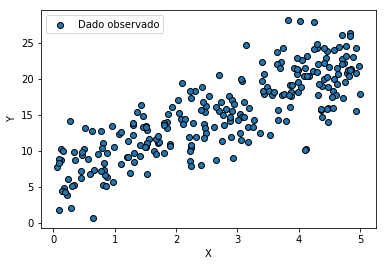

In [13]:
plt.scatter(X,y,edgecolor='black',label='Dado observado')
plt.xlabel('X') ; plt.ylabel('Y')
plt.legend()

In [18]:
theta_ini = np.random.normal(size=2) #escolhendo um valor aleatório para o theta inicial
theta_ini

array([1.7451469, 0.2014731])

In [29]:
theta_calc, cost_hist, theta_hist = stochastic_gradient_descent(X,y,theta_ini,alpha=0.05,ninter=1000,q=0.25)
theta_calc2, cost_hist2, theta_hist2 = gradient_descent(X,y,theta_ini,alpha=0.01,ninter=1000)

In [30]:
print("modelo inicial: {} \n modelo gradiente descent: {}  \n modelo gradiente estocástico: {}".format(theta_ini,theta_calc2,theta_calc))


modelo inicial: [1.7451469 0.2014731] 
 modelo gradiente descent: [3.34788248 5.9191812 ]  
 modelo gradiente estocástico: [3.08079952 6.85406173]


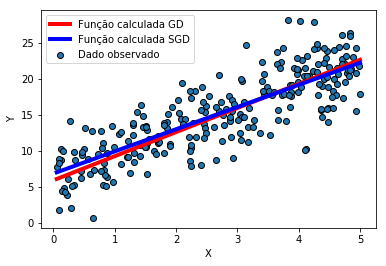

In [40]:
X_sort = X.copy()
X_sort.sort()
plt.scatter(X,y,edgecolor='black',label='Dado observado')
plt.plot(X_sort,predict(theta_calc2,np.append(X_sort.reshape((len(X),1)),(np.ones((len(X),1))),axis=1)),lw=4,c='red',label='Função calculada GD')
plt.plot(X_sort,predict(theta_calc,np.append(X_sort.reshape((len(X),1)),(np.ones((len(X),1))),axis=1)),lw=4,c='blue',label='Função calculada SGD')

plt.xlabel('X') ; plt.ylabel('Y')
plt.legend()

In [34]:
from sklearn.metrics import mean_squared_error

In [39]:
print('Erro médio quadrático do algortimo de Gradient Descent: ', mean_squared_error(y,predict(theta_calc2,np.append(X_sort.reshape((len(X),1)),(np.ones((len(X),1))),axis=1))))
print('Erro médio quadrático do algortimo de Stochastic Gradient Descent: ', mean_squared_error(y,predict(theta_calc,np.append(X_sort.reshape((len(X),1)),(np.ones((len(X),1))),axis=1))))

Erro médio quadrático do algortimo de Gradient Descent:  54.31903683057953
Erro médio quadrático do algortimo de Stochastic Gradient Descent:  50.733889095267195
